<a href="https://colab.research.google.com/github/Jean040191/datascience/blob/main/OrdersDelayedMoreThan15Days.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Importando bibliotecas Pandas e Matplotlib


**Importing libraries Pandas and Matplotlib**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

**Uploading a file in CSV format. Check your project path so you don't make mistakes**

In [9]:
file_path = 'olist_orders_dataset.csv'
df = pd.read_csv(file_path)

**convert  date's string columns in datatime**

In [11]:
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])

**Check and calculator difference between 'order_delivered_customer_date' and 'order_estimated_delivery_date'**

In [13]:
df['delivery_delay'] = (df['order_delivered_customer_date'] - df['order_estimated_delivery_date']).dt.days

**Filtre late delivered orders with more than 15 days**

In [18]:
df_delays = df[df['delivery_delay'] > 15]

**Group the results by month and year of estimated delivered dates**

In [15]:
df_delays['year_month'] = df_delays['order_estimated_delivery_date'].dt.to_period('M')
monthly_delays = df_delays.groupby('year_month').size()

<ipython-input-15-b6404b1a52a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delays['year_month'] = df_delays['order_estimated_delivery_date'].dt.to_period('M')


**Plot late deliveries on line chart**

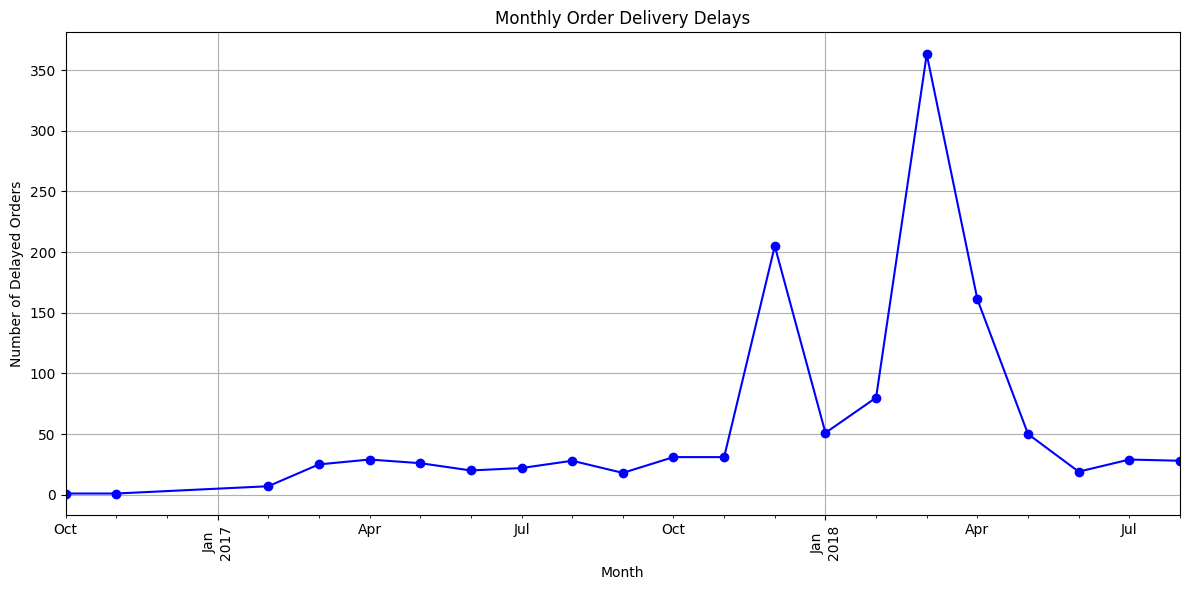

In [19]:
plt.figure(figsize=(12,6))
monthly_delays.plot(kind='line', color='blue', marker='o')
plt.title('Monthly Order Delivery Delays')
plt.xlabel('Month')
plt.ylabel('Number of Delayed Orders')
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()